<a href="https://colab.research.google.com/github/ritik1831/Algebraic_Geometry_REU_2023/blob/main/Algebraic_Geometry_REU_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
This code contains the functions neccessary to 1.) Generate homogeneous coordinates in n variables over Z_p, and
2.) Generate all distinct, homogeneous, degree d polynomials over Z_p.

We have three parameters, (i) the prime p, (ii) the degree d, and (iii) the number of variables n.

6/12/2023: Removed duplicate polynomial multiples.
6/13/2023: Improved efficiency of generate_all_polynomials function using some linear algebra.
'''

from sympy import symbols, latex
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import warnings

def countBase(digits, p):
    out = []
    # Recursive function to generate tuples representing digits in base p
    if digits == 1:
        for num in range(0, p):
            out.append((num,))
        return out
    for prev in countBase(digits - 1, p):
        for num in range(0, p):
            out.append((num,) + prev)
    return out

def makeHomogeneousPoints(dimension, p):
    out = [()]
    # Generate all possible homogeneous coordinates using countBase function
    for n in range(0, dimension):
        out += countBase(n + 1, p)
    for n in range(0, len(out)):
        out[n] = (1,) + out[n]
        for c in range(len(out[n]), dimension + 1):
            out[n] = (0,) + out[n]
    return out

def generate_all_monomials(d, n):
    if n == 1:
        return {symbols('x')**d}  # When n = 1, return a set with a single symbol raised to the power of d

    variables = symbols(' '.join(['x_' + str(i) for i in range(1, n + 1)]))
    monomials = set()

    # Generate all combinations of powers for the variables using the product function
    for powers_combination in product(range(d + 1), repeat=n):
        # Check if the powers combination satisfies the total degree condition
        if sum(powers_combination) == d:
            monomial = 1
            # Construct the monomial using the powers and variables
            for power, variable in zip(powers_combination, variables):
                monomial *= variable**power
            monomials.add(monomial)

    return monomials

def generate_all_polynomials(d, p, n):
    # Generate all monomials of degree d in n variables
    monomials = generate_all_monomials(d, n)
    polynomials = set()

    coeff_combinations = np.array(list(makeHomogeneousPoints(len(monomials) - 1, p)))

    # Generate the polynomials using linear algebra operations
    polynomial_matrix = np.dot(coeff_combinations, np.array(list(monomials)))

    # Filter out the zero polynomials
    nonzero_polynomials = polynomial_matrix[polynomial_matrix != 0]

    # Convert the polynomials to SymPy expressions
    for polynomial in nonzero_polynomials:
        polynomials.add(polynomial)

    return polynomials

 ########################################################################################################################################################


In [ ]:
''' These are the parameters '''
#########################################################
p = 5 # Prime in Z_p
d = 2  # Degree of homogenous polynomials
n = 2  # Number of variables in Z_p[x_1 . . . x_n]

dim = n-1  # Dimension of P^n
#########################################################

polynomials = generate_all_polynomials(d, p, n) # Generate degree d homogeneous polynomials
points = makeHomogeneousPoints(dim, p)  # Generate homogeneous coordinates

In [ ]:
''' This cell prints each polynomial with its respective zero set. We also
create a list that stores the number of roots of each polynomial.'''

zero_dist = []  # zero_dist[i] = number of zeros of ith polynomial
space_fillers = []

for i, polynomial in enumerate(polynomials): # For each respective polynomial
    latex_output = latex(polynomial)
    zero_set = [] # Initialize zero set
    for point in points: # For each homogenous coordinate
        value = polynomial.subs(zip(symbols('x_1 x_2 x_3'), point))
        if value % p == 0:
            zero_set.append(point) # If a point evaluates to a multiple of p, add it to the zero set

    if len(zero_set) == len(points):
      space_fillers.append(polynomial)

    zero_dist.append(len(zero_set))  # Append the number of zeros to the list
    print(f"Polynomial {i+1}: {latex_output}") # Print the polynomial
    print(f"Zero set: {zero_set}") # Print its zero set

Polynomial 1: x_{1}^{2} + 3 x_{1} x_{2} + 2 x_{2}^{2}
Zero set: [(1, 2), (1, 4)]
Polynomial 2: x_{1}^{2} + 4 x_{1} x_{2} + x_{2}^{2}
Zero set: []
Polynomial 3: x_{1}^{2} + 4 x_{1} x_{2}
Zero set: [(0, 1), (1, 1)]
Polynomial 4: x_{1}^{2} + 2 x_{1} x_{2} + 4 x_{2}^{2}
Zero set: []
Polynomial 5: x_{1}^{2}
Zero set: [(0, 1)]
Polynomial 6: x_{1}^{2} + x_{1} x_{2} + 2 x_{2}^{2}
Zero set: []
Polynomial 7: x_{1} x_{2} + x_{2}^{2}
Zero set: [(1, 0), (1, 4)]
Polynomial 8: x_{1}^{2} + 3 x_{1} x_{2} + 3 x_{2}^{2}
Zero set: []
Polynomial 9: x_{1}^{2} + x_{1} x_{2} + 3 x_{2}^{2}
Zero set: [(1, 1), (1, 2)]
Polynomial 10: x_{1}^{2} + 2 x_{1} x_{2} + 2 x_{2}^{2}
Zero set: [(1, 1), (1, 3)]
Polynomial 11: x_{1}^{2} + 2 x_{2}^{2}
Zero set: []
Polynomial 12: x_{1}^{2} + 4 x_{2}^{2}
Zero set: [(1, 1), (1, 4)]
Polynomial 13: x_{1} x_{2}
Zero set: [(0, 1), (1, 0)]
Polynomial 14: x_{1}^{2} + 2 x_{1} x_{2} + 3 x_{2}^{2}
Zero set: []
Polynomial 15: x_{2}^{2}
Zero set: [(1, 0)]
Polynomial 16: x_{1}^{2} + 4 x_{1} 

In [ ]:
''' This cell prints the polynomials that vanish on every coordinate. '''
print("Space-filling polynomials:")
for i, curve in enumerate(space_fillers):
    latex_output = latex(curve)
    print(f"Curve {i+1}: {latex_output}") # Print the polynomial

Space-filling polynomials:


In [ ]:
''' This cell computes the mean and standard deviation. For fun, I've included skewness and kurtosis. '''

max_roots = max(zero_dist)
total_roots = len(points)

# Compute mean, standard deviation, skewness, kurtosis
mean = np.mean(zero_dist)
std_dev = np.std(zero_dist)
skewness = skew(zero_dist)
kurt = kurtosis(zero_dist)

# If one of the moments cannot be computed
warnings.filterwarnings("ignore")

# Print mean, standard deviation, skewness, kurtosis, and total possible roots
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")
print(f"Total Possible Roots: {total_roots}")

Mean: 1.16
Standard Deviation: 0.88
Skewness: -0.32
Kurtosis: -1.64
Total Possible Roots: 6


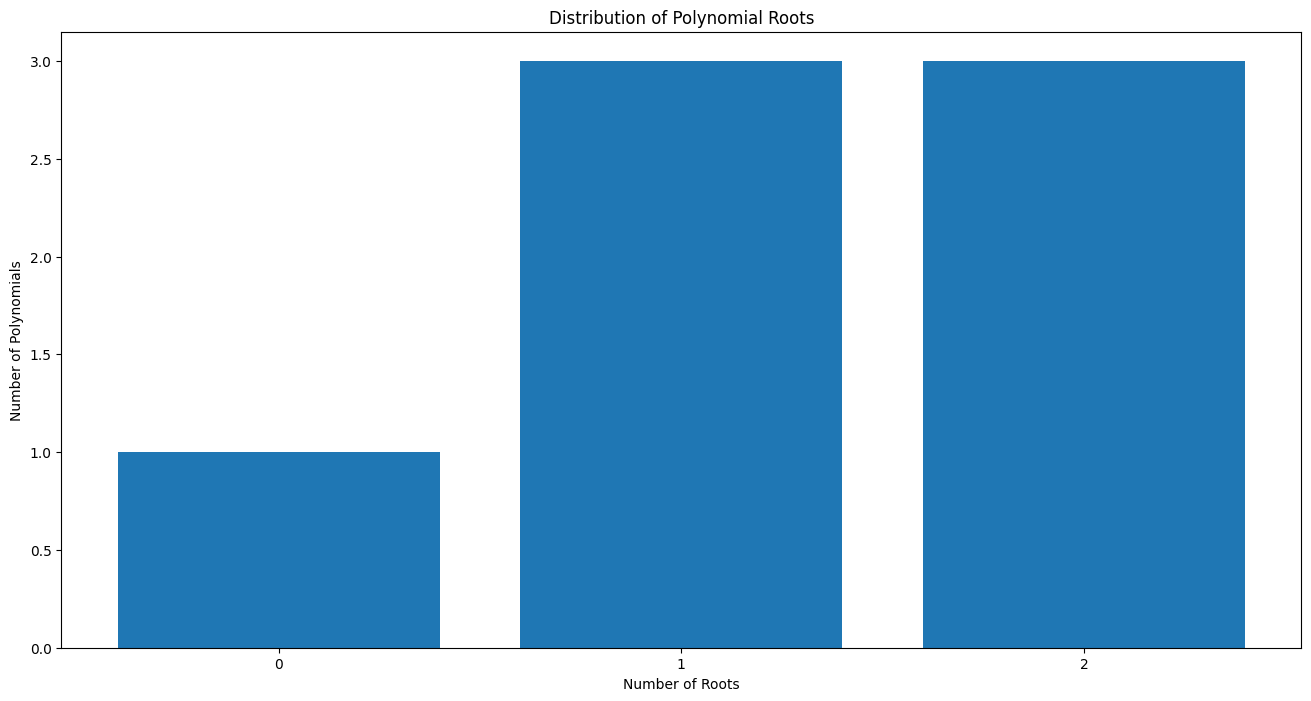

In [ ]:
'''This cell outputs a bar graph with (0 to # of homogeneous points) on the
x-axis, and the number of polynomials on the y-axis. '''

bucket_counts = []

# Count the number of polynomials with each number of roots
for i in range(max_roots + 1):
    bucket_counts.append(zero_dist.count(i))

# Create x and y values for the bar chart
x = np.arange(max_roots + 1)
y = np.array(bucket_counts)

# Plot the bar chart
plt.figure(figsize=(16, 8))  # Adjust the figsize as desired
plt.bar(x, y)
plt.xlabel('Number of Roots')
plt.ylabel('Number of Polynomials')
plt.title('Distribution of Polynomial Roots')
plt.xticks(x)

# Show the plot
plt.show()

# 6/12: p = 2 d = 4 n = 3 gives a normal distribution (32,767 polynomials). Seems true in general when p = 2, d => 3, n => 2.